**Imports**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split as tts
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor  #GBM algorithm
from sklearn.model_selection import cross_val_score,GridSearchCV  #Additional scklearn functions and Performing grid search
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler


**EDA**

In [ ]:
df_2021 = pd.read_csv('/content/drive/MyDrive/data_bootcamp/DS_project/2021_data.csv')
df_2023 = pd.read_csv('/content/drive/MyDrive/data_bootcamp/DS_project/2023_data.csv')

In [ ]:
df_2021.head()

,address,price,area,year,room,elevator,parking,storage,آبشار,آبشار تهران,...,کوی هفدهم شهریور,گاندی,گرگان,گلاب دره,گلچین,گمرک,گیشا,یاخچی آباد,یافت آباد,یوسف آباد
0,نازی آباد,1.400000e+09,53.0,1394.0,1.0,1.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,آذربایجان,1.580000e+09,70.0,1385.0,2.0,1.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,دروس,NaN,280.0,1399.0,4.0,1.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,آهنگ,7.000000e+08,45.0,1382.0,1.0,1.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,سبلان,NaN,87.0,1399.0,2.0,1.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_2023.head()

,address,price,area,year,room,elevator,parking,storage,آبشار,آبشار تهران,...,کوی هفدهم شهریور,گاندی,گرگان,گلاب دره,گلچین,گمرک,گیشا,یاخچی آباد,یافت آباد,یوسف آباد
0,درکه,1.836000e+10,153.0,1393.0,3.0,1.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,زعفرانیه,1.300000e+11,418.0,1382.0,4.0,1.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,جابری,2.600000e+09,57.0,1385.0,2.0,1.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,فرمانیه,2.300000e+10,193.0,1371.0,3.0,1.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,دهکده المپیک,1.410000e+09,62.0,1401.0,1.0,1.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Price Prediction**

2023 data

In [ ]:
from sklearn.model_selection import train_test_split
train_2023, test_2023 = train_test_split(df_2023, test_size=0.3, random_state=0)

In [ ]:
# train_2023['storage'].replace(to_replace=np.NaN,value=train_2023['storage'].mode()[0],inplace=True)
# train_2023['elevator'].replace(to_replace=np.NaN,value=train_2023['elevator'].mode()[0],inplace=True)
# train_2023['parking'].replace(to_replace=np.NaN,value=train_2023['parking'].mode()[0],inplace=True)
# train_2023['year'].replace(to_replace=np.NaN,value=train_2023['year'].mode()[0],inplace=True)
# train_2023['room'].replace(to_replace=np.NaN,value=train_2023['room'].mode()[0],inplace=True)

# from sklearn.impute import KNNImputer

# imputer = KNNImputer()
# imputer.fit(train_2023[['price','area']])

# df_num_imputed_2023 = imputer.transform(train_2023[['price','area']])
# train_2023['price'], train_2023['area'] = df_num_imputed_2023[:, 0], df_num_imputed_2023[:, 1]

# sns.heatmap(train_2023[:7].isnull())


In [ ]:
train_2023 = train_2023.dropna()
train_2023 = train_2023.drop('address', axis=1)
y_train_2023 = train_2023.pop('price')
X_train_2023 = train_2023
X_train_2023.shape

scaler=MinMaxScaler()
X=scaler.fit_transform(X_train_2023)

In [ ]:
test_2023 = test_2023.dropna()
test_2023 = test_2023.drop('address', axis=1)
y_test_2023 = test_2023.pop('price')
X_test_2023 = test_2023
X_test_2023.shape

scaler=MinMaxScaler()
X=scaler.fit_transform(X_test_2023)

In [ ]:
X3 = pd.concat([train_2023, test_2023], axis=0)
X3.reset_index(drop=True, inplace=True)

y3 = pd.concat([y_train_2023, y_test_2023], axis=0)
y3.reset_index(drop=True, inplace=True)

In [ ]:
X3.isnull().sum()
y3.isnull().sum()

0

2021 data

In [ ]:
from sklearn.model_selection import train_test_split
train_2021, test_2021 = train_test_split(df_2021, test_size=0.3, random_state=0)

<Axes: >

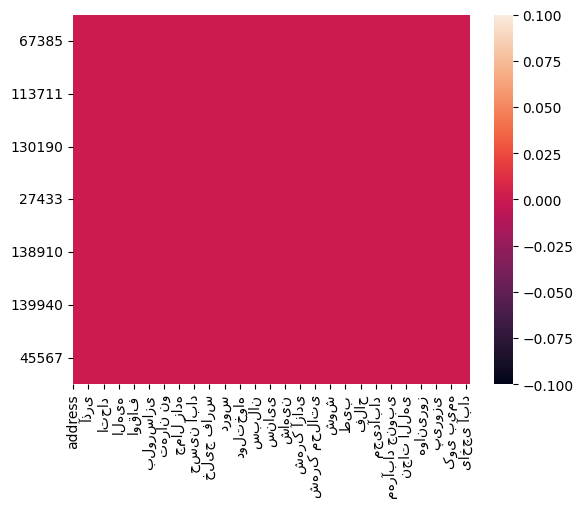

In [ ]:
# train_2021['storage'].replace(to_replace=np.NaN,value=train_2021['storage'].mode()[0],inplace=True)
# train_2021['elevator'].replace(to_replace=np.NaN,value=train_2021['elevator'].mode()[0],inplace=True)
# train_2021['parking'].replace(to_replace=np.NaN,value=train_2021['parking'].mode()[0],inplace=True)
# train_2021['year'].replace(to_replace=np.NaN,value=train_2021['year'].mode()[0],inplace=True)
# train_2021['room'].replace(to_replace=np.NaN,value=train_2021['room'].mode()[0],inplace=True)

# from sklearn.impute import KNNImputer

# imputer = KNNImputer()
# imputer.fit(train_2021[['price','area']])

# df_num_imputed_2021 = imputer.transform(train_2021[['price','area']])
# train_2021['price'], train_2021['area'] = df_num_imputed_2021[:, 0], df_num_imputed_2021[:, 1]

# sns.heatmap(train_2021[:7].isnull())


In [ ]:
train_2021 = train_2021.dropna()
train_2021 = train_2021.drop('address', axis=1)
y_train_2021 = train_2021.pop('price')
X_train_2021 = train_2021
X_train_2021.shape

scaler=MinMaxScaler()
X=scaler.fit_transform(X_train_2021)

In [ ]:
test_2021 = test_2021.dropna()
test_2021 = test_2021.drop('address', axis=1)
y_test_2021 = test_2021.pop('price')
X_test_2021 = test_2021
X_test_2021.shape

scaler=MinMaxScaler()
X=scaler.fit_transform(X_test_2021)

In [ ]:
X1 = pd.concat([train_2021, test_2021], axis=0)
X1.reset_index(drop=True, inplace=True)

y1 = pd.concat([y_train_2021, y_test_2021], axis=0)
y1.reset_index(drop=True, inplace=True)

In [ ]:
X1.isnull().sum()


area          0
year          0
room          0
elevator      0
parking       0
             ..
گمرک          0
گیشا          0
یاخچی آباد    0
یافت آباد     0
یوسف آباد     0
Length: 313, dtype: int64

regression 2023

In [ ]:
def modelfit(alg, train,target,test,target_test, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(train, target)

    #Predict training set:
    train_predictions = alg.predict(train)
    test_predictions = alg.predict(test)

    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, train, target, cv=cv_folds)

    #Print model report:
    print ("\nModel Report")
    print ("Accuracy on train: {}".format(alg.score(train, target)))
    print ("Accuracy on test: {}".format(alg.score(test, target_test)))
    print("Mean absolute error : {}".format(mean_absolute_error(target_test,test_predictions)))
    print("Mean squared error : {}".format(mean_squared_error(target_test,test_predictions)))
    print("Root mean squared error : {}".format(np.sqrt(mean_squared_error(target_test,test_predictions))))


    if performCV:
        print ("CV Score : Mean - {} | Std - {} | Min - {} | Max - {}".format(np.mean(cv_score),np.std(cv_score),
                                                                              np.min(cv_score),np.max(cv_score)))

    #Print Feature Importance:
    if printFeatureImportance:
        feature_imp=alg.feature_importances_.tolist()
        feature_columns=list(train.columns)
        Import_Df = pd.DataFrame({'Feature': list(train.columns),
                   'Importance': alg.feature_importances_})
        Import_Df = Import_Df.sort_values(by='Importance',ascending=False)[:10]


        fig=plt.figure(figsize=(8,4))
        fig = sns.barplot(data=Import_Df,x='Feature',y='Importance')
        plt.xticks(rotation=90)
        plt.title("Feature Importances",fontsize=20)
        plt.xlabel("Feature",fontsize=15)
        plt.ylabel("Importances",fontsize=15)
        plt.show()
        Import_Df.head()

Gradient Boosting Model


Model Report
Accuracy on train: 0.8822500845167444
Accuracy on test: 0.8629897937581512
Mean absolute error : 3743917600.9667153
Mean squared error : 8.127630288753276e+19
Root mean squared error : 9015337092.285166
CV Score : Mean - 0.6685259790558007 | Std - 0.0834967094512948 | Min - 0.5598457445702227 | Max - 0.7730576439454694


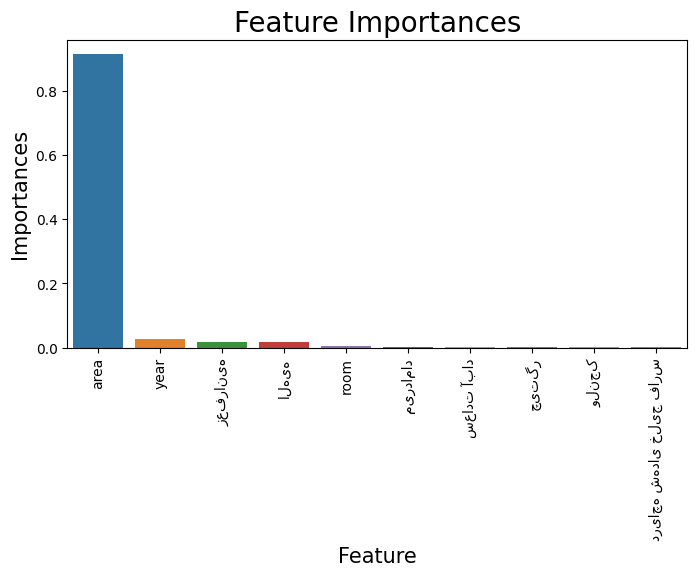

In [ ]:
gbm0_2023 = GradientBoostingRegressor(random_state=5)
modelfit(gbm0_2023,X_train_2023,y_train_2023,X_test_2023,y_test_2023)

Tunning Gradient Boost Model

In [ ]:
param_test1 = {'n_estimators':range(1000,4000,1000)}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.05, min_samples_split=10,min_samples_leaf=15,max_depth=4,max_features='sqrt',random_state=5),
param_grid = param_test1, cv=5)
gsearch1.fit(X_train_2023,y_train_2023)

gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 4.09336152,  8.68184042, 12.01607728]),
  'std_fit_time': array([0.67046752, 1.35518746, 0.92894239]),
  'mean_score_time': array([0.04373555, 0.06841455, 0.12463584]),
  'std_score_time': array([0.00931256, 0.00082204, 0.03159   ]),
  'param_n_estimators': masked_array(data=[1000, 2000, 3000],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 1000},
   {'n_estimators': 2000},
   {'n_estimators': 3000}],
  'split0_test_score': array([0.76709372, 0.76484018, 0.7622155 ]),
  'split1_test_score': array([0.66714665, 0.66635622, 0.66308613]),
  'split2_test_score': array([0.67645832, 0.67621001, 0.6702174 ]),
  'split3_test_score': array([0.86468917, 0.86118045, 0.85210686]),
  'split4_test_score': array([0.76746981, 0.76124384, 0.75454687]),
  'mean_test_score': array([0.74857153, 0.74596614, 0.74043455]),
  'std_test_score': array([0.07213023, 0.07080626, 0.06936498]),
  'rank_test_scor


Model Report
Accuracy on train: 0.8143473838504967
Accuracy on test: 0.8458348781069334
Mean absolute error : 2799915030.3330426
Mean squared error : 9.145283030635356e+19
Root mean squared error : 9563097317.624325
CV Score : Mean - 0.7390206174727171 | Std - 0.0794954611390144 | Min - 0.6084454939268331 | Max - 0.8359452053775523


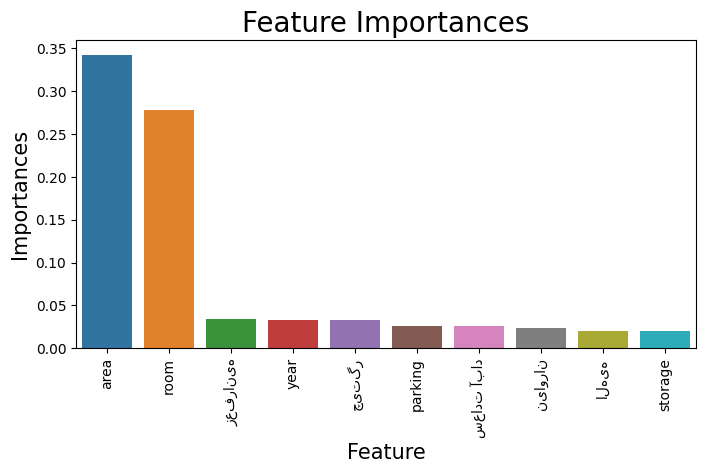

In [ ]:
gbm1_2023 = GradientBoostingRegressor(random_state=5,n_estimators=1000,learning_rate=0.05,
                                max_depth=9,min_samples_split=17,max_features='sqrt',
                                min_samples_leaf=13,loss='huber')
modelfit(gbm1_2023,X_train_2023,y_train_2023,X_test_2023,y_test_2023)

**Calculate Price Increase Based On 2023 Model on 2021 Data**

In [ ]:
predicted_2021_from_2023 = gbm1_2023.predict(X1)
price_increase = abs(y1 - predicted_2021_from_2023)
df_2021['Increase'] = price_increase

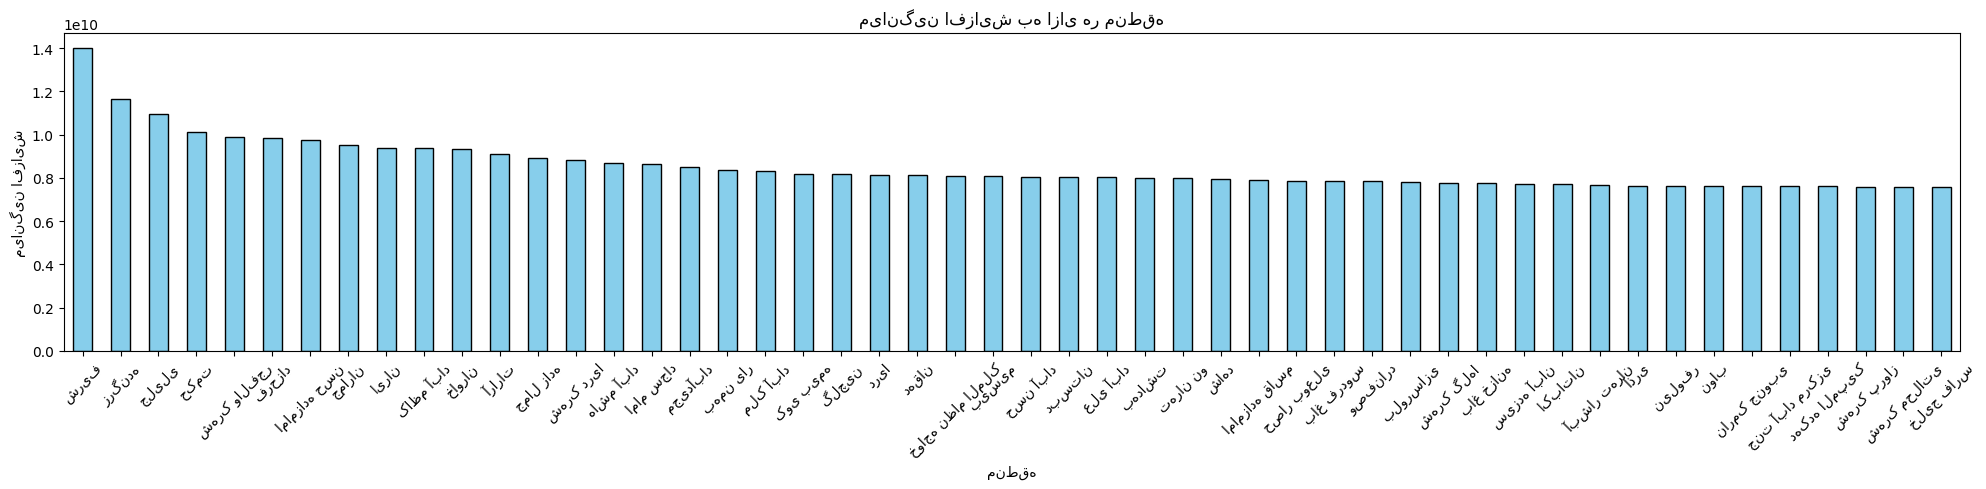

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
pd.set_option('display.float_format', lambda x: '%.3f' % x)

def reverse_text(text):
    return text[::-1]

# Reverse the district names in the DataFrame
# df_2021['address'] = df_2021['address'].apply(reverse_text)
average_increase = df_2021.groupby('address')['Increase'].mean().sort_values(ascending=False)

plt.figure(figsize = (20, 5))
average_increase[:50].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('میانگین افزایش به ازای هر منطقه')
plt.xlabel('منطقه')
plt.ylabel('میانگین افزایش')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2021 Regressor


Model Report
Accuracy on train: 0.7852271585694413
Accuracy on test: 0.6267839716736581
Mean absolute error : 2025513714.9871268
Mean squared error : 3.926093179809623e+19
Root mean squared error : 6265854434.799474
CV Score : Mean - 0.7397696024231507 | Std - 0.03443002025314819 | Min - 0.6810630388001462 | Max - 0.778637538290313


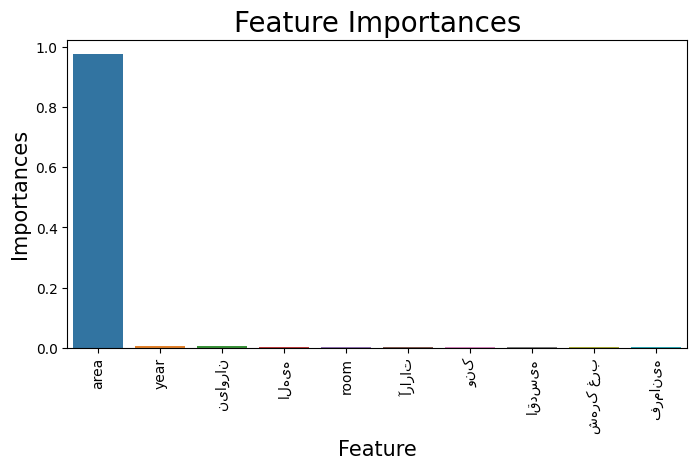

In [ ]:
gbm0_2021 = GradientBoostingRegressor(random_state=5)
modelfit(gbm0_2021,X_train_2021,y_train_2021,X_test_2021,y_test_2021)

In [ ]:
# param_test1_2021 = {'n_estimators':range(1000,4000,1000)}
# gsearch1_2021 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.05, min_samples_split=10,min_samples_leaf=15,max_depth=4,max_features='sqrt',random_state=5),
# param_grid = param_test1_2021, cv=5)
# gsearch1_2021.fit(X_train_2021,y_train_2021)

# gsearch1_2021.cv_results_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
# gbm1_2021 = GradientBoostingRegressor(random_state=5,n_estimators=3000,learning_rate=0.05,
#                                 max_depth=9,min_samples_split=17,max_features='sqrt',
#                                 min_samples_leaf=13,loss='huber')
# modelfit(gbm1_2021,X_train_2021,y_train_2021,X_test_2021,y_test_2021)

**Calculate Price Increase Based On 2021 Model on 2023 Data**

In [ ]:
predicted_2023_from_2021 = gbm0_2021.predict(X3)
price_increase = abs(y3 - predicted_2023_from_2021)
df_2023['Increase'] = price_increase

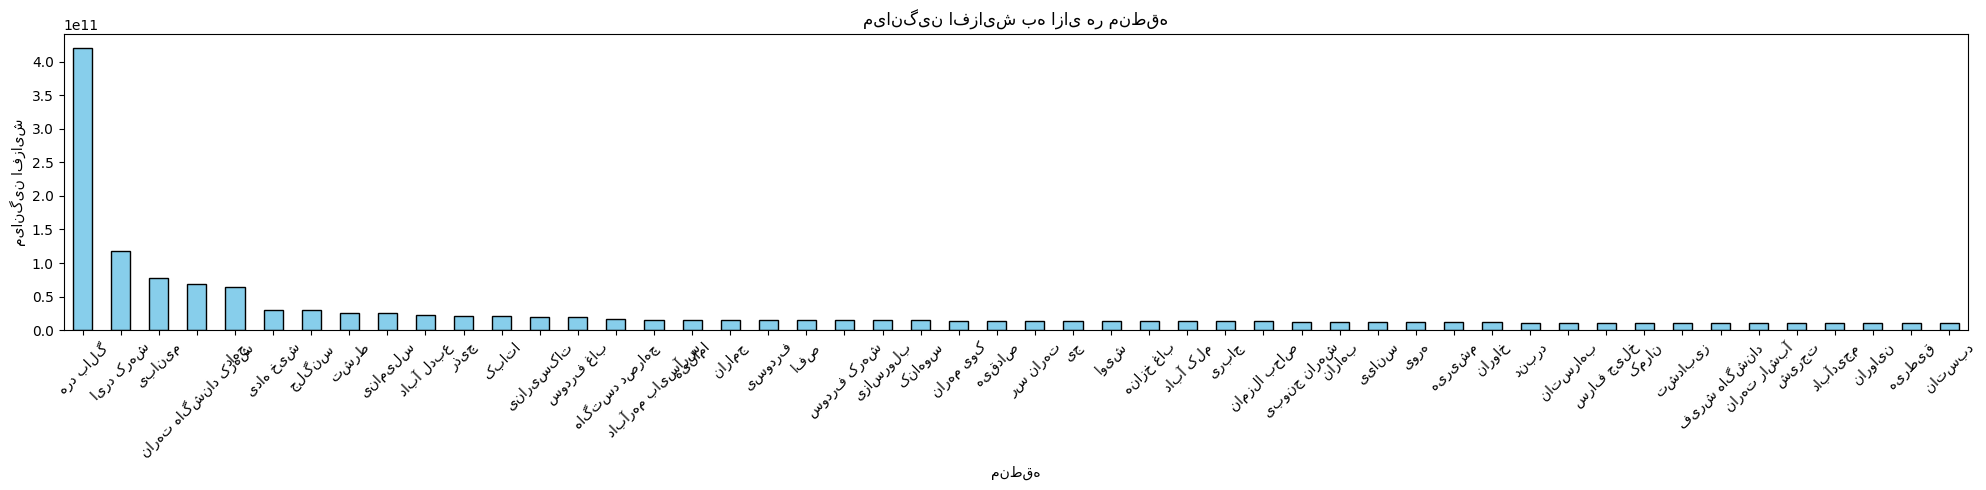

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
pd.set_option('display.float_format', lambda x: '%.3f' % x)

def reverse_text(text):
    return text[::-1]

# Reverse the district names in the DataFrame
df_2023['address'] = df_2023['address'].apply(reverse_text)
average_increase_2023 = df_2023.groupby('address')['Increase'].mean().sort_values(ascending=False)

plt.figure(figsize = (20, 5))
average_increase_2023[:50].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('میانگین افزایش به ازای هر منطقه')
plt.xlabel('منطقه')
plt.ylabel('میانگین افزایش')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_2021.head()

In [ ]:
df_2021['district'] = df_2021['district'].apply(reverse_text)
df_2023['district'] = df_2023['district'].apply(reverse_text)

In [ ]:
df_2021.to_csv('/content/drive/MyDrive/data_bootcamp/DS_project/2021_data_Increase.csv', index=False)

df_2023.to_csv('/content/drive/MyDrive/data_bootcamp/DS_project/2023_data_Increase.csv', index=False)